# Berkeley Data Analytics Bookcamp – Project 1

## Cryptocurrency

### An Eagle's Eye View – David

### Top 10s – Josefina

In [1]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from config import api_key

In [2]:
#Looked for the information in Crypto Compare. Build the url for both requests. 
urlmktcap=f"https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=USD&api_key={api_key}"
urlvolume="https://min-api.cryptocompare.com/data/top/totalvolfull?limit=10&tsym=USD&api_key={api_key}"

In [4]:
#For the first analysis: get the information with json format, and isolates data items for easy reading
responsemktcap=requests.get(urlmktcap).json()
datamktcap=responsemktcap["Data"]

In [6]:
#Obtain the names of the top 10 main currencies considering Market Capitalization. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_mktcap_list=[]
price_mktcap_list=[]
mktcap_list=[]
for index in indexes:
    name=datamktcap[index]["CoinInfo"]["FullName"]
    price=datamktcap[index]["RAW"]["USD"]["PRICE"]
    mktcap=datamktcap[index]["RAW"]["USD"]['MKTCAP']
    name_mktcap_list.append(name)
    price_mktcap_list.append(price)
    mktcap_list.append(mktcap)

In [7]:
#Create a DataFrame with the information obtained.
mktcap_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})

In [10]:
#Format the columns and present the data.
mktcap_df1["Price"] = mktcap_df1["Price"].map("${:,.2f}".format)
mktcap_df1["Market Capitalization"] = mktcap_df1["Market Capitalization"].map("${:,.2f}".format)
mktcap_df1

,Cryptocurrency,Price,Market Capitalization
0,Bitcoin,"$22,837.00","$440,242,117,297.00"
1,Ethereum,"$1,569.11","$192,018,057,221.01"
2,Tether,$1.00,"$67,811,335,333.20"
3,Binance Coin,$311.76,"$50,903,229,610.65"
4,USD Coin,$1.00,"$42,708,478,549.85"
5,XRP,$0.39,"$39,195,742,955.66"
6,Aptos,$16.84,"$17,134,519,187.70"
7,BUSD,$1.00,"$15,730,618,727.77"
8,Solana,$24.04,"$12,974,006,146.62"
9,Dogecoin,$0.09,"$12,625,957,240.40"


<function matplotlib.pyplot.show(close=None, block=None)>

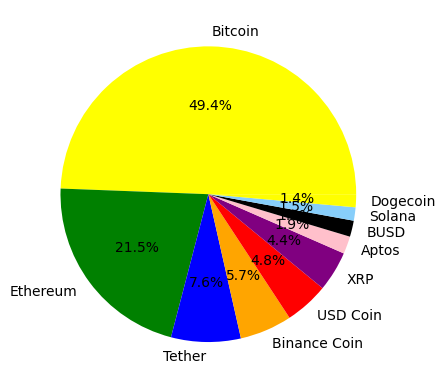

In [12]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's market capitalization.
mktcap_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Market Capitalization":mktcap_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(mktcap_df["Market Capitalization"], labels=mktcap_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")
# Save an image of the chart and print the final product to the screen
plt.savefig("Images/PieMktCap.png")
plt.show

In [13]:
#For the second analysis: get the information with json format, and isolates data items for easy reading
responsevolume=requests.get(urlvolume).json()
datavolume=responsevolume["Data"]

In [15]:
#Obtain the names of the top 10 main currencies considering 24-hour trading volume. Create a list for the name, price and mktcap for each cryptocurrencies in the top 10. 
indexes=range(0,10)
name_volume_list=[]
price_volume_list=[]
volume_list=[]
for index in indexes:
    name_v=datavolume[index]["CoinInfo"]["FullName"]
    price_v=datavolume[index]["RAW"]["USD"]["PRICE"]
    volume=datavolume[index]["RAW"]["USD"]['VOLUME24HOUR']
    name_volume_list.append(name_v)
    price_volume_list.append(price_v)
    volume_list.append(volume)

In [20]:
#Create a DataFrame with the information
volume_df1=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Volume":volume_list
})

In [21]:
#Format the columns
volume_df1["Price"] = volume_df1["Price"].map("${:,.2f}".format)
volume_df1["Volume"] = volume_df1["Volume"].map("{:,.2f}".format)
volume_df1

,Cryptocurrency,Price,Volume
0,Bitcoin,"$22,837.00","72,274.29"
1,Ethereum,"$1,569.11","586,588.99"
2,Tether,$1.00,"2,283,852.49"
3,Binance Coin,$311.76,"341,873,754.06"
4,USD Coin,$1.00,"177,866,684.26"
5,XRP,$0.39,"801,646.93"
6,Aptos,$16.84,"1,039,824,455.20"
7,BUSD,$1.00,"735,258.93"
8,Solana,$24.04,"4,021,773.58"
9,Dogecoin,$0.09,"46,152.95"


<function matplotlib.pyplot.show(close=None, block=None)>

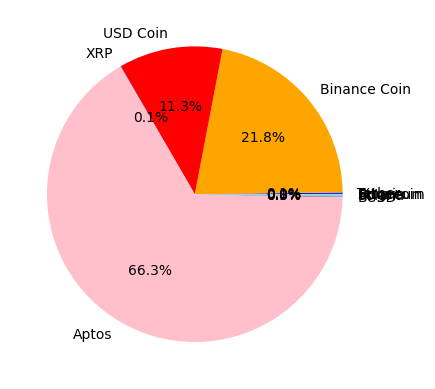

In [22]:
#Present the information in a Pie chart; with the objective of visualize the relative size of each cryptocurrency's volumen trade in the past 24 hours.
volume_df=pd.DataFrame({
    "Cryptocurrency":name_mktcap_list,
    "Price":price_mktcap_list,
    "Volume":volume_list
})
colors = ["yellow","green","blue","orange","red","purple","pink","black","lightskyblue"]
plt.pie(volume_df["Volume"], labels=volume_df["Cryptocurrency"], colors=colors,
        autopct="%1.1f%%")

# Save an image of the chart and print the final product to the screen
plt.savefig("Images/Pievolume.png")
plt.show

### Narrowing in on Bitcoin and Ethereum – Tristian